# <center><font color=red>[Learning SciPy for Numerical and Scientific Computing - Second Edition](https://www.packtpub.com/big-data-and-business-intelligence/learning-scipy-numerical-and-scientific-computing-second-edition)</font></center>

>### Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2015 Sergio Rojas (srojas@usb.ve) and Erik A Christensen (erikcny@aol.com). ###

## <b><font color='red'>     NOTE: This IPython notebook should be read alonside the corresponding chapter in the book, where each piece of code is fully explained.     </font></b> <br>

# <center>Chapter 2. Working with Numpy Array as a first step to Scipy</center>

## Summary

In this chapter we explore in depth the creation and basic manipulation of the object array used by SciPy, as an overview of the NumPy libraries. In particular, we'll introduce the principles of slicing and masking, which simplify the coding of algorithms to the point of transforming an otherwise unreadable sequence of loops and primitive commands, into an intuitive and self-explanatory set of object calls and methods. We also will learn that the nonbasic modules in NumPy are replicated as modules in SciPy itself. The chapter roughly follows the same structure as the official NumPy reference (which the reader can access at the SciPy pages at <a href="http://docs.scipy.org/doc/numpy/reference/"  target="_blank">
             <b>docs.scipy.org/doc/numpy/reference</b> </a> ). There are other good sources that cover NumPy with rigor, and we refer you to any of that other material for a more detailed coverage of this topic.


## References

* **Scipy Reference**<br>
<http://docs.scipy.org/doc/scipy/reference/>
<br>

* **Image manipulation and processing using Numpy and Scipy**<br>
<http://scipy-lectures.github.io/advanced/image_processing/>
<br>

* **Numpy and Scipy Documentation**<br>
<http://docs.scipy.org/doc/>
<br>

* **Numpy Tutorial**<br>
<http://wiki.scipy.org/Tentative_NumPy_Tutorial>

* **Numpy Data type objects**<br>
<http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html>
<br>

# Working with Numpy Array as a first step to Scipy

In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import scipy.misc

In [4]:
#img=scipy.misc.lena() # RuntimeError: lena() is no longer included in SciPy
img=scipy.misc.imread('lena.png', flatten=0)

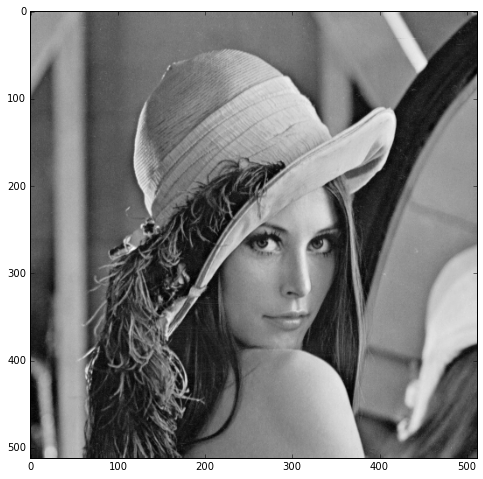

In [5]:
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.gray()
plt.imshow(img)
plt.show()

In [7]:
print(img[0:3,0:7])


[[159 159 159 158 159 153 160]
 [159 159 159 158 159 153 160]
 [159 159 159 158 159 153 160]]


In [8]:
img[1,1:6]=0
print(img[0:3,0:7])

[[159 159 159 158 159 153 160]
 [159   0   0   0   0   0 160]
 [159 159 159 158 159 153 160]]


## Object essentials

In [9]:
print(img.dtype, img.shape, img.size)

uint8 (512, 512) 262144


In [10]:
print(img[32,67])

72


### Datatype

In [12]:
#img=scipy.misc.lena().astype('float32') #RuntimeError: lena() is no longer included in SciPy
img=scipy.misc.imread('lena.png', flatten=0)
img=img.astype('float32')
scores = numpy.array([101,103,84], dtype='float32')
print(scores)

[ 101.  103.   84.]


In [13]:
print(scores.dtype)

float32


In [14]:
scores = numpy.float32([101,103,84])
print(scores)

[ 101.  103.   84.]


In [15]:
print(scores.dtype)

float32


In [16]:
a=numpy.array(['Cleese', 'Idle', 'Gilliam'], dtype='str_')
print(a)

['Cleese' 'Idle' 'Gilliam']


In [17]:
print(a.dtype)

<U7


In [18]:
dt=numpy.dtype([ ('name', numpy.str_, 16), ('grades', numpy.float64, (2,)) ])

In [19]:
MA141=numpy.array([ ('Cleese', (7.0,8.0)), ('Gilliam', (9.0,10.0)) ], dtype=dt)
print(MA141)

[('Cleese', [7.0, 8.0]) ('Gilliam', [9.0, 10.0])]


In [20]:
MA141

array([('Cleese', [7.0, 8.0]), ('Gilliam', [9.0, 10.0])], 
      dtype=[('name', '<U16'), ('grades', '<f8', (2,))])

In [21]:
print(MA141.dtype)

[('name', '<U16'), ('grades', '<f8', (2,))]


### Indexing

In [22]:
A=numpy.array([[1,2,3,4,5,6,7,8],[2,4,6,8,10,12,14,16]])
print(A[0:2, 0:8:2])

[[ 1  3  5  7]
 [ 2  6 10 14]]


In [23]:
print(A[0:2, 8:0:-2])

[[ 8  6  4  2]
 [16 12  8  4]]


In [24]:
print(A[ [0,0,1,1], [0,3,2,5] ])

[ 1  4  6 12]


In [25]:
print(A[ numpy.ix_( [0,1], [0,3] )])

[[1 4]
 [2 8]]


## The array object

In [29]:
value=0; # img=scipy.misc.lena() # raise RuntimeError 'lena() is no longer included in SciPy
img=scipy.misc.imread('lena.png', flatten=0)
#img=img.astype('float32')
for item in img.flat: value+=item
print(value)

30092377


<b>The next instruction will create the file "lena.txt" in the current directory (refers to the textbook for additional details)</b>

In [30]:
img.tofile("lena.txt",sep=" ",format="%i")

In [31]:
A=numpy.array([11,13,15,17,19,18,16,14,12,10])
print (type(A))

<class 'numpy.ndarray'>


In [32]:
print(A.argsort(kind='mergesort'))

[9 0 8 1 7 2 6 3 5 4]


In [33]:
A.argsort(kind='mergesort')

array([9, 0, 8, 1, 7, 2, 6, 3, 5, 4])

In [34]:
A.sort()
print (A)

[10 11 12 13 14 15 16 17 18 19]


In [35]:
A=numpy.array([[1,1,1],[2,2,2],[3,3,3]])
print(A.mean())

2.0


In [36]:
print(A.mean(axis=0))

[ 2.  2.  2.]


In [37]:
print(A.mean(axis=1))

[ 1.  2.  3.]


In [38]:
print(img.min(), img.max(), img.ptp())


0 255 255


In [39]:
A=img.clip(img.min(),img.min()+100)
print(A.min(), A.max(), A.ptp())

0 100 100


## Routines for array creation

In [40]:
Z=numpy.zeros((5,5), dtype=int)
print(Z)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [41]:
U=numpy.ones((2,2), dtype=int)
print(U)


[[1 1]
 [1 1]]


In [42]:
I=numpy.identity(3, dtype=int)
print(I)


[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [43]:
D=numpy.eye(4,k=1) + numpy.eye(4,k=-1)
print( D)


[[ 0.  1.  0.  0.]
 [ 1.  0.  1.  0.]
 [ 0.  1.  0.  1.]
 [ 0.  0.  1.  0.]]


In [44]:
A=3.0*(numpy.eye(5,k=4) + numpy.eye(5,k=-4))
A[0:2,0:2]=5*U; A[2:5,2:5]=6*I
print(A)

[[ 5.  5.  0.  0.  3.]
 [ 5.  5.  0.  0.  0.]
 [ 0.  0.  6.  0.  0.]
 [ 0.  0.  0.  6.  0.]
 [ 3.  0.  0.  0.  6.]]


In [45]:
B=numpy.fromfunction( (lambda i,j: i*j), (4,4), dtype=int)
print(B)

[[0 0 0 0]
 [0 1 2 3]
 [0 2 4 6]
 [0 3 6 9]]


In [46]:
print(B==0)

[[ True  True  True  True]
 [ True False False False]
 [ True False False False]
 [ True False False False]]


In [49]:
#B += numpy.fromfunction((lambda i,j:i*i+j*j), (4,4))*(B==0)
B += numpy.fromfunction((lambda i,j:i*i+j*j), (4,4), dtype=int)*(B==0)
print(B)

[[0 1 4 9]
 [1 1 2 3]
 [4 2 4 6]
 [9 3 6 9]]


In [50]:
print( B%2!=0)


[[False  True False  True]
 [ True  True False  True]
 [False False False False]
 [ True  True False  True]]


In [51]:
print(numpy.where(B%2!=0))


(array([0, 0, 1, 1, 1, 3, 3, 3]), array([1, 3, 0, 1, 3, 0, 1, 3]))


In [52]:
numpy.putmask( B, B%2!=0, B**2+1)
print(B)

[[ 0  2  4 82]
 [ 2  2  2 10]
 [ 4  2  4  6]
 [82 10  6 82]]


In [53]:
L1=numpy.arange(-1,1,0.3)
print(L1)


[-1.  -0.7 -0.4 -0.1  0.2  0.5  0.8]


In [54]:
L2=numpy.linspace(-1,1,4)
print(L2)


[-1.         -0.33333333  0.33333333  1.        ]


In [55]:
L3= numpy.logspace(-1,1,4)
print(L3)


[  0.1          0.46415888   2.15443469  10.        ]


In [56]:
print(numpy.meshgrid(L2,L3))

[array([[-1.        , -0.33333333,  0.33333333,  1.        ],
       [-1.        , -0.33333333,  0.33333333,  1.        ],
       [-1.        , -0.33333333,  0.33333333,  1.        ],
       [-1.        , -0.33333333,  0.33333333,  1.        ]]), array([[  0.1       ,   0.1       ,   0.1       ,   0.1       ],
       [  0.46415888,   0.46415888,   0.46415888,   0.46415888],
       [  2.15443469,   2.15443469,   2.15443469,   2.15443469],
       [ 10.        ,  10.        ,  10.        ,  10.        ]])]


In [57]:
print(numpy.mgrid[0:5,0:5])

[[[0 0 0 0 0]
  [1 1 1 1 1]
  [2 2 2 2 2]
  [3 3 3 3 3]
  [4 4 4 4 4]]

 [[0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]
  [0 1 2 3 4]]]


In [58]:
print(numpy.ogrid[0:5,0:5])

[array([[0],
       [1],
       [2],
       [3],
       [4]]), array([[0, 1, 2, 3, 4]])]


In [59]:
B=numpy.ones((3,3))
checker2by2=numpy.zeros((6,6))
checker2by2[0:3,0:3]=checker2by2[3:6,3:6]=B

In [60]:
print(numpy.tile(checker2by2,(4,4)))


[[ 1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.
   1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.
   1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.
   1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.
   0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.
   0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.
   0.  0.  0.  1.  1.  1.]
 [ 1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.
   1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.
   1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.
   1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  1.  1.  1.
   0.  0.  0.  1.

## Routines for the combination of two or more arrays

<b>Loading in memory necessary modules</b>

In [61]:
import scipy.ndimage 
import numpy as np 
import matplotlib.pyplot as plt 

<b>Loading in memory the image</b>

In [62]:
text = scipy.ndimage.imread('Chap_02_text_image.png') 

<b>Preprocessing the image to bring it as close as possible to the greyscale approximation</b>

In [63]:
text = np.mean(text.astype(float)/255,-1)*2-1

<b>Let&rsquo;s take a look to the text image</b>

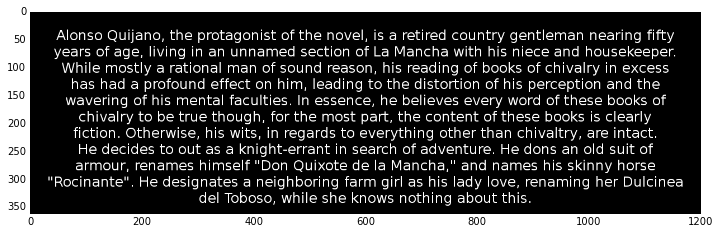

In [64]:
plt.imshow(text)
plt.show() 

<b>Find the pattern in the image to be match</b>

In [65]:
letterE = text[37:53,275:291]

<b>Let&rsquo;s take a look to the text pattern</b>

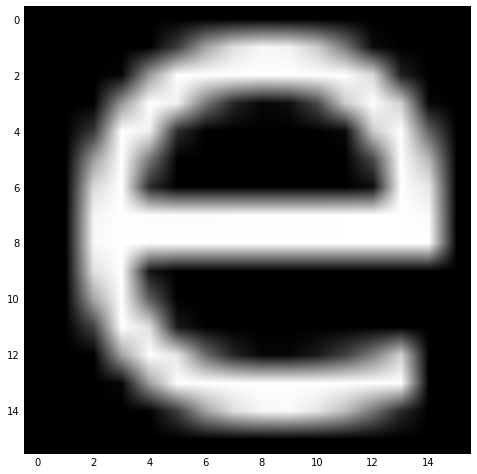

In [66]:
plt.imshow(letterE)
plt.show() 

In [67]:
corr = scipy.ndimage.correlate(text,letterE)
eLocations = (corr >= 0.95 * corr.max())

In [68]:
CorrLocIndex = np.where(eLocations==True)

In [69]:
x=CorrLocIndex[1] 
x 

array([ 283,  514,  583,  681,  722,  881,  929, 1023,   64,  188,  452,
        504,  892,  921, 1059, 1087, 1102, 1133,  118,  547,  690, 1066,
       1110,  330,  363,  519,  671,  913,  951, 1119,  120,  292,  441,
        516,  557,  602,  649,  688,  717,  747,  783,  813,  988, 1016,
        250,  309,  505,  691,  769,  876,  904, 1057,  224,  289,  470,
        596,  626,  780, 1027,  112,  151,  203,  468,  596,  751,  817,
        867,  203,  273,  369,  560,  599,  888, 1111,  159,  221,  260,
        352,  427,  861,  901, 1034, 1146,  325,  506,  558])

In [70]:
y=CorrLocIndex[0] 
y 

array([ 45,  45,  45,  45,  45,  45,  45,  45,  74,  74,  74,  74,  74,
        74,  74,  74,  74,  74, 103, 103, 103, 103, 103, 132, 132, 132,
       132, 132, 132, 132, 161, 161, 161, 161, 161, 161, 161, 161, 161,
       161, 161, 161, 161, 161, 190, 190, 190, 190, 190, 190, 190, 190,
       219, 219, 219, 219, 219, 219, 219, 248, 248, 248, 248, 248, 248,
       248, 248, 277, 277, 277, 277, 277, 277, 277, 306, 306, 306, 306,
       306, 306, 306, 306, 306, 335, 335, 335])

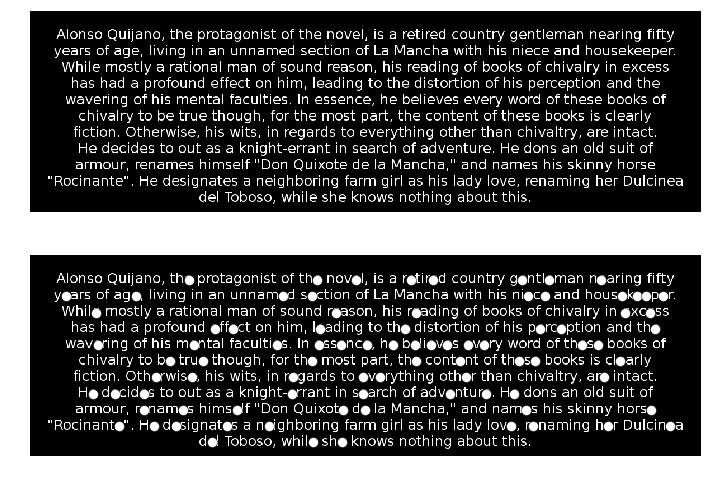

In [71]:
thefig=plt.figure() 
plt.subplot(211) 
plt.imshow(text, cmap=plt.cm.gray, interpolation='nearest') 
plt.axis('off') 
plt.subplot(212) 
plt.imshow(text, cmap=plt.cm.gray, interpolation='nearest') 
plt.autoscale(False) 
plt.plot(x,y,'wo',markersize=10) 
plt.axis('off') 
plt.show() 

##  Routines for array manipulation

<b>The next two Ipython inputs are repeated here for completeness (they were introduced earlier in this notebook)</b>

In [72]:
B=numpy.ones((3,3))
checker2by2=numpy.zeros((6,6))


In [73]:
checker2by2[0:3,0:3]=checker2by2[3:6,3:6]=B
numpy.tile(checker2by2,(4,4))


array([[ 1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
         0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
         0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
         0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.,  1.

In [74]:
print(checker2by2)


[[ 1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.  1.]
 [ 0.  0.  0.  1.  1.  1.]]


In [75]:
print(numpy.vsplit(checker2by2,3))

[array([[ 1.,  1.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0.,  0.,  0.]]), array([[ 1.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  1.,  1.]]), array([[ 0.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  1.,  1.,  1.]])]


In [76]:
a=numpy.array([-numpy.pi, numpy.pi])


In [77]:
print(numpy.vstack((a, numpy.sin(a))))


[[ -3.14159265e+00   3.14159265e+00]
 [ -1.22464680e-16   1.22464680e-16]]


In [78]:
def max100(x):
    return max(x,100)


<font color=red><b>Refers to the textbook for why the next commands output a ValueError</b></font>

In [79]:
max100(a)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [80]:
numpy.vectorize(max100)(a)

array([100, 100])

## Routines to extract information from arrays

In [81]:
A=numpy.array([5,1,1,2,1,1,2,2,10,3,3,4,5])
numpy.unique(A)

array([ 1,  2,  3,  4,  5, 10])

In [82]:
numpy.bincount(A)


array([0, 4, 3, 2, 1, 2, 0, 0, 0, 0, 1])

In [83]:
A=numpy.fromfunction((lambda i,j: (i+1)*(-1)**(i*j)), (4,4))
print(A)

[[ 1.  1.  1.  1.]
 [ 2. -2.  2. -2.]
 [ 3.  3.  3.  3.]
 [ 4. -4.  4. -4.]]


<font color=red> As discussed in the book, the next command will generate a RuntimeWarning from python computational engine</font>

In [84]:
B=numpy.log2(A)
print(B)

[[ 0.         0.         0.         0.       ]
 [ 1.               nan  1.               nan]
 [ 1.5849625  1.5849625  1.5849625  1.5849625]
 [ 2.               nan  2.               nan]]


/home/srojas/myProg/Anaconda340/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log2
  if __name__ == '__main__':


In [85]:
print(numpy.sum(B), numpy.nansum(B))

nan 12.3398500029


## <center> This is the end of the working codes shown and thoroughly discussed in Chapter 2 of the book  <font color=red>[Learning SciPy for Numerical and Scientific Computing - Second Edition](https://www.packtpub.com/big-data-and-business-intelligence/learning-scipy-numerical-and-scientific-computing-second-edition)</font>
</center>

>### Content under [Creative Commons Attribution license CC-BY 4.0](http://creativecommons.org/licenses/by/4.0/), [code under MIT license (c)](http://en.wikipedia.org/wiki/MIT_License)2015 Sergio Rojas (srojas@usb.ve) and Erik A Christensen (erikcny@aol.com). ###